In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

Text(0, 0.5, 'y / m')

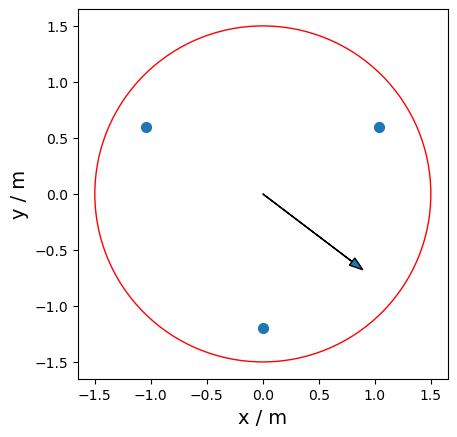

In [2]:
# Plot PMT positions 
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot


x = [1.039, -1.039,  0.000]
y = [ 0.600  ,  0.600 , -1.200]
z = [1.200 , 1.200 , 1.200 ]

theta = 1.1170107
phi = 5.6344995

shower_dir = [np.cos(phi) * np.sin(theta), np.sin(phi) * np.sin(theta), np.cos(theta)]
xy_dir = [np.cos(phi), np.sin(phi)]

x_array = [0, xy_dir[0]]
y_array = [0, xy_dir[1]]

plt.arrow(0,0, *xy_dir,
          head_width=0.08)

circle1 = plt.Circle((0, 0), 1.5, color='r',fill='')

ax.add_patch(circle1)
ax.scatter(x,y,s=50)
ax.set_box_aspect(1)
plt.xlabel('x / m',size=14)
plt.ylabel('y / m',size=14)

In [3]:
data=pd.read_csv('/Users/workspace/Software/Pierre_Tank/testb_3', sep ='\t',header=None)

In [4]:
data

,0,1,2,3,4,5,6
0,4,1,0.0325,23,17,13,16
1,6,-3,4.2705,140,344,110,0
2,9,3,26.4669,85,59,269,0
3,14,3,3.0757,32,51,325,0
4,16,1,0.1528,43,22,110,151
...,...,...,...,...,...,...,...
34354,99982,-2,0.0080,2,6,80,0
34355,99986,3,0.5876,119,242,161,16
34356,99992,3,3.9792,70,170,147,422
34357,99995,2,0.0174,15,22,13,0


### 
PMTs 1, 2 and 3 are at the bottom of the tank 
### 
PMT 4 is in the middle of the top layer 

In [5]:
data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4"]
data


,num,id,energy,pmt1,pmt2,pmt3,pmt4
0,4,1,0.0325,23,17,13,16
1,6,-3,4.2705,140,344,110,0
2,9,3,26.4669,85,59,269,0
3,14,3,3.0757,32,51,325,0
4,16,1,0.1528,43,22,110,151
...,...,...,...,...,...,...,...
34354,99982,-2,0.0080,2,6,80,0
34355,99986,3,0.5876,119,242,161,16
34356,99992,3,3.9792,70,170,147,422
34357,99995,2,0.0174,15,22,13,0


In [6]:
# Plot energy of each particle type 
e_elec = data.query("id == 2 or id == -2")['energy']
e_gamma = data.query("id == 1")['energy']
e_mu = data.query("id == 3 or id == -3")['energy']

Text(0, 0.5, 'Entries')

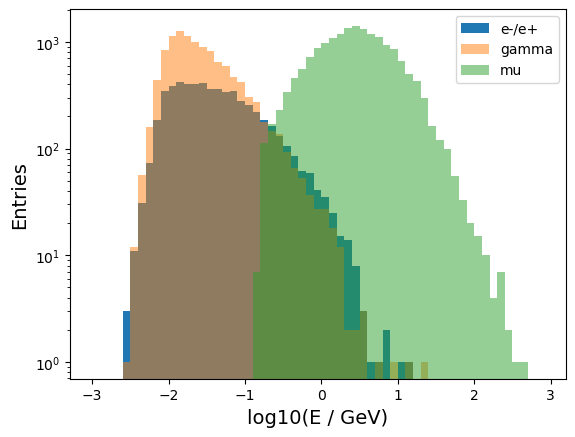

In [7]:
ebins = np.arange(-3,3,0.1)

plt.hist(np.log10(e_elec), bins = ebins, label='e-/e+')
plt.hist(np.log10(e_gamma), bins = ebins, alpha=0.5, label='gamma')
plt.hist(np.log10(e_mu), bins = ebins, alpha=0.5, label='mu')

plt.legend()
plt.yscale('log')
plt.xlabel(r'log10(E / GeV)',size=14)
plt.ylabel('Entries',size=14)

In [8]:
pmt1_em = data.query("id == 1 or id == 2 or id == -2")['pmt1']
pmt2_em = data.query("id == 1 or id == 2 or id == -2")['pmt2']
pmt3_em = data.query("id == 1 or id == 2 or id == -2")['pmt3']
pmt4_em = data.query("id == 1 or id == 2 or id == -2")['pmt4']

In [9]:
pmt1_mu = data.query("id == 3 or id == -3")['pmt1']
pmt2_mu = data.query("id == 3 or id == -3")['pmt2']
pmt3_mu = data.query("id == 3 or id == -3")['pmt3']
pmt4_mu = data.query("id == 3 or id == -3")['pmt4']

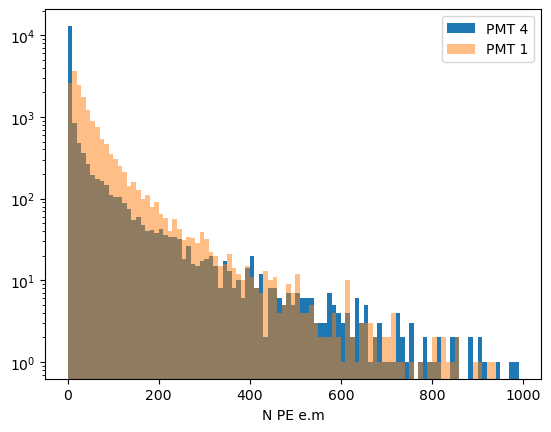

In [10]:
npe_bins = np.arange(0,1000,10)
npe_bins_lim = np.arange(0,200,5)

plt.hist(pmt4_em, bins=npe_bins, label='PMT 4')
plt.hist(pmt1_em, bins=npe_bins, label='PMT 1', alpha = 0.5)
plt.xlabel('N PE e.m')
plt.yscale('log')
plt.legend()

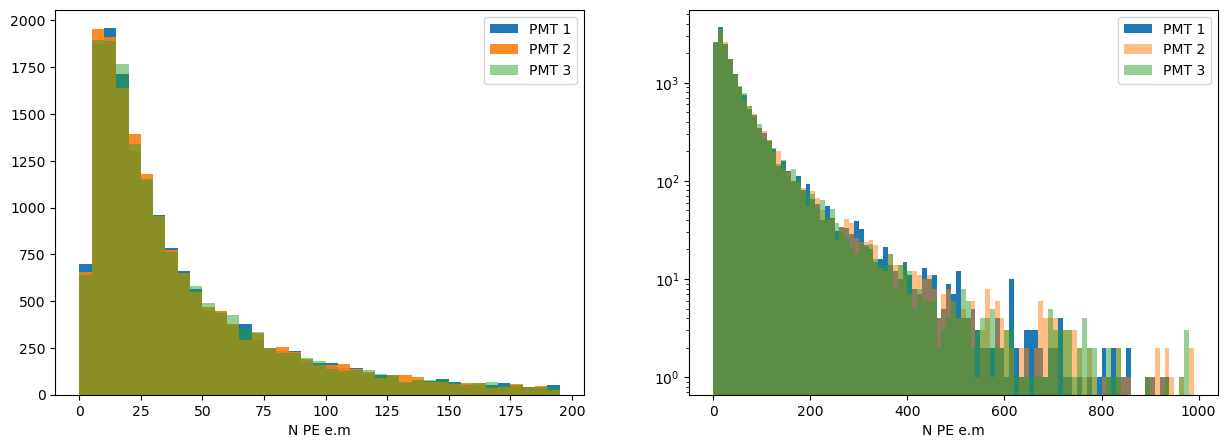

In [11]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt1_em, bins=npe_bins_lim, label='PMT 1')
plt.hist(pmt2_em, bins=npe_bins_lim, label='PMT 2', alpha = 0.9)
plt.hist(pmt3_em, bins=npe_bins_lim, label='PMT 3', alpha = 0.5)
plt.xlabel('N PE e.m')
plt.yscale('linear')
plt.legend()

plt.subplot(1,2,2)
plt.hist(pmt1_em, bins=npe_bins, label='PMT 1')
plt.hist(pmt2_em, bins=npe_bins, label='PMT 2', alpha = 0.5)
plt.hist(pmt3_em, bins=npe_bins, label='PMT 3', alpha = 0.5)
plt.xlabel('N PE e.m')
plt.yscale('log')
plt.legend()

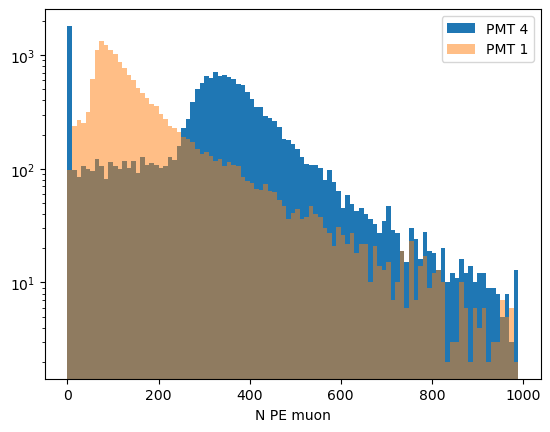

In [12]:
npe_bins = np.arange(0,1000,10)

plt.hist(pmt4_mu, bins=npe_bins, label='PMT 4')
plt.hist(pmt1_mu, bins=npe_bins, label='PMT 1', alpha = 0.5)
plt.xlabel('N PE muon')
plt.yscale('log')
plt.legend()

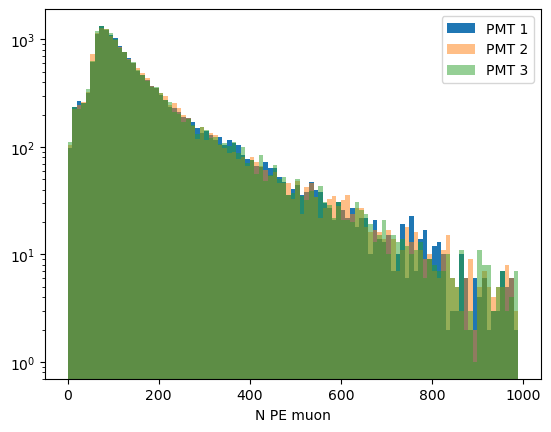

In [13]:
plt.hist(pmt1_mu, bins=npe_bins, label='PMT 1')
plt.hist(pmt2_mu, bins=npe_bins, label='PMT 2', alpha=0.5)
plt.hist(pmt3_mu, bins=npe_bins, label='PMT 3', alpha = 0.5)
plt.xlabel('N PE muon')
plt.yscale('log')
plt.legend()

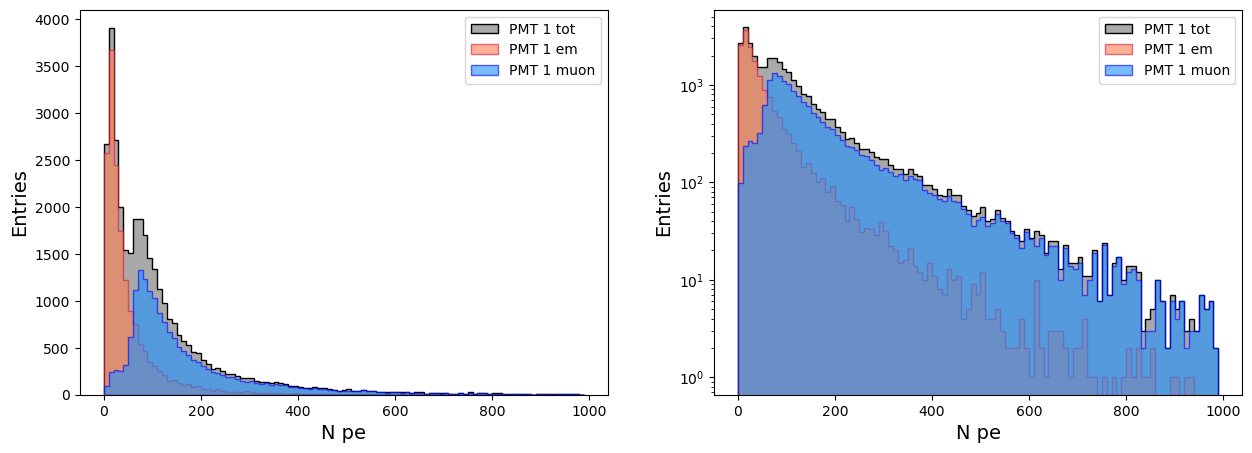

In [14]:
plt.subplots(1,2,figsize=(15,5))

pmt1_mu = np.asarray(pmt1_mu)
pmt1_em = np.asarray(pmt1_em)
pmt1_tot = np.concatenate((pmt1_mu,pmt1_em))

plt.subplot(1,2,1)
plt.hist(pmt1_tot, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt1_tot, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('log')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/plots/allpart_PMT1.pdf')


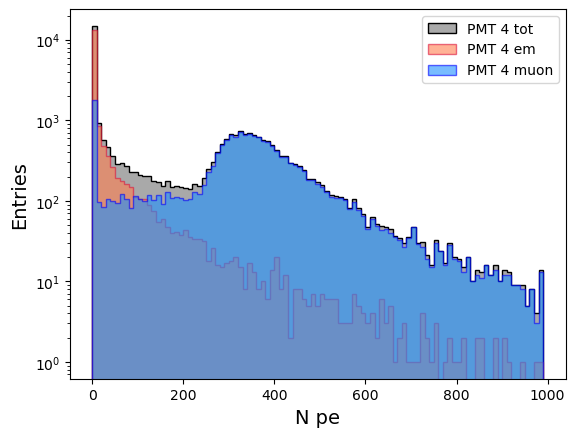

In [15]:
pmt4_mu = np.asarray(pmt4_mu)
pmt4_em = np.asarray(pmt4_em)
pmt4_tot = np.concatenate((pmt4_mu,pmt4_em))


plt.hist(pmt4_tot, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 4 tot' )
plt.hist(pmt4_em, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 4 em')
plt.hist(pmt4_mu, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 4 muon',alpha=0.6)
plt.legend()
plt.yscale('log')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/plots/allpart_PMT4.pdf')


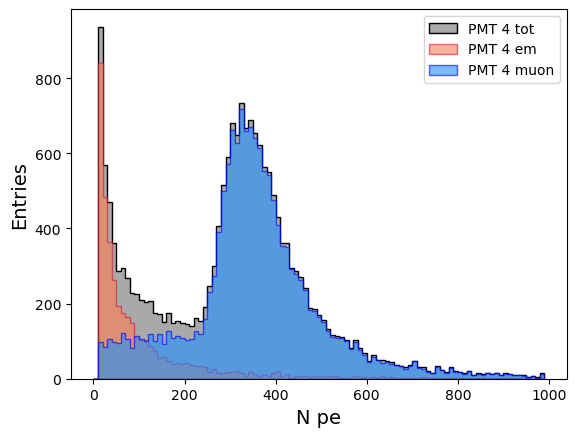

In [16]:
min_npe = 10

plt.hist(pmt4_tot[pmt4_tot >= min_npe  ], bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 4 tot' )
plt.hist(pmt4_em[pmt4_em >= min_npe], bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 4 em')
plt.hist(pmt4_mu[pmt4_mu >= min_npe], bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 4 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/plots/allpart_PMT4_lin_npe10.pdf')


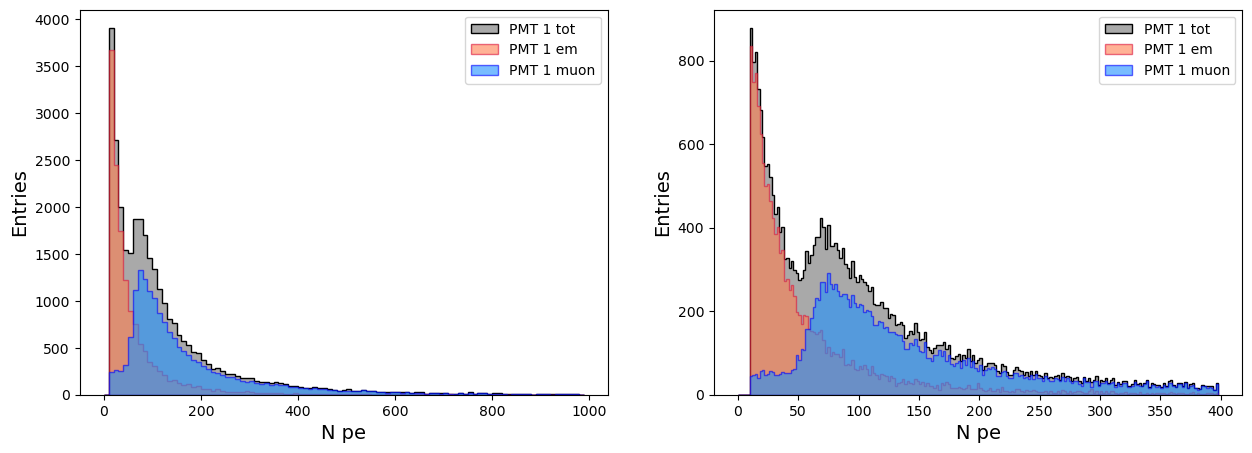

In [17]:
plt.subplots(1,2,figsize=(15,5))
min_npe = 10

plt.subplot(1,2,1)

plt.hist(pmt1_tot[pmt1_tot >= min_npe], bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em[pmt1_em >= min_npe], bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu[pmt1_mu >= min_npe], bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
npe_bins = np.arange(0,400,2)

plt.hist(pmt1_tot[pmt1_tot >= min_npe], bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt1_em[pmt1_em >= min_npe], bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt1_mu[pmt1_mu >= min_npe], bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)
plt.savefig('/Users/workspace/Software/Pierre_Tank/plots/allpart_PMT1_lin_npe10.pdf')
